<a href="https://colab.research.google.com/github/JuanM-GG/Biologia-de-sistemas/blob/main/metodo_euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Método de Euler

Nombre: Biología de sistemas

Fecha: 15 de diciembre del 2020

Consideremos las siguientes reacciones.

$$r_{1}: \hspace{1cm} A + B \rightarrow C $$ 
$$r_{2}: \hspace{1cm} C + B \rightarrow D $$

La reacción $r_{1}$ representa la formación del producto $C$ a partir de los reactivos $A$ y $B$. Mientras que la reacción $r_{2}$ representa la reacción indeseable que consume parte del producto formado $C$ para generar un producto secundario $D$

Considerando las reacciones como los únicos procesos que influyen en el cambio de concentración, mediante un balance se llega al siguiente sistema de ecuaciones.

$$\frac{dC_{A}}{dt} = -k_{1}C_{A}C_{B}$$\
$$\frac{dC_{B}}{dt} = -k_{1}C_{A}C_{B} -k_{2}C_{B}C_{C} $$\
$$\frac{dC_{C}}{dt} = k_{1}C_{A}C_{B}-k_{2}C_{B}C_{C}$$\
$$\frac{dC_{D}}{dt} = k_{2}C_{B}C_{C}$$

# Método de Euler 

Cargar librerías

In [ ]:
install.packages("deSolve")
library(deSolve)
install.packages("ggplot2")
library(ggplot2)

Establecer valor de parámetros

In [2]:
k1 <- 1.0
k2 <- 1.5

Timepo de integración 

In [3]:
tf <- 3.0
dt <- 0.2
times <- seq(0,tf+0.01,by=dt)
n <- length(times)

Vectores para guardar las concentraciones 

In [4]:
Ca <- rep(1,n)
Cb <- rep(1,n)
Cc <- rep(0,n)
Cd <- rep(0,n)

Iteramos sobre el intervalo que nos interesa simular aplicando la fórmula:

$$\vec{x}_{i} = \vec{x}_{i-1} + F(\vec{x}_{i-1},\vec{p})* \Delta t$$

In [6]:
for (i in 2:n) {

  r1 <- k1*Ca[i-1]*Cb[i-1]
  r2 <- k2*Cb[i-1]*Cc[i-1]

  Ca[i] <- Ca[i-1] - r1*dt
  Cb[i] <- Cb[i-1] - (r1 + r2)*dt
  Cc[i] <- Cc[i-1] + (r1 - r2)*dt
  Cd[i] <- Cd[i-1] + r2*dt
}

Mostrar resultados 

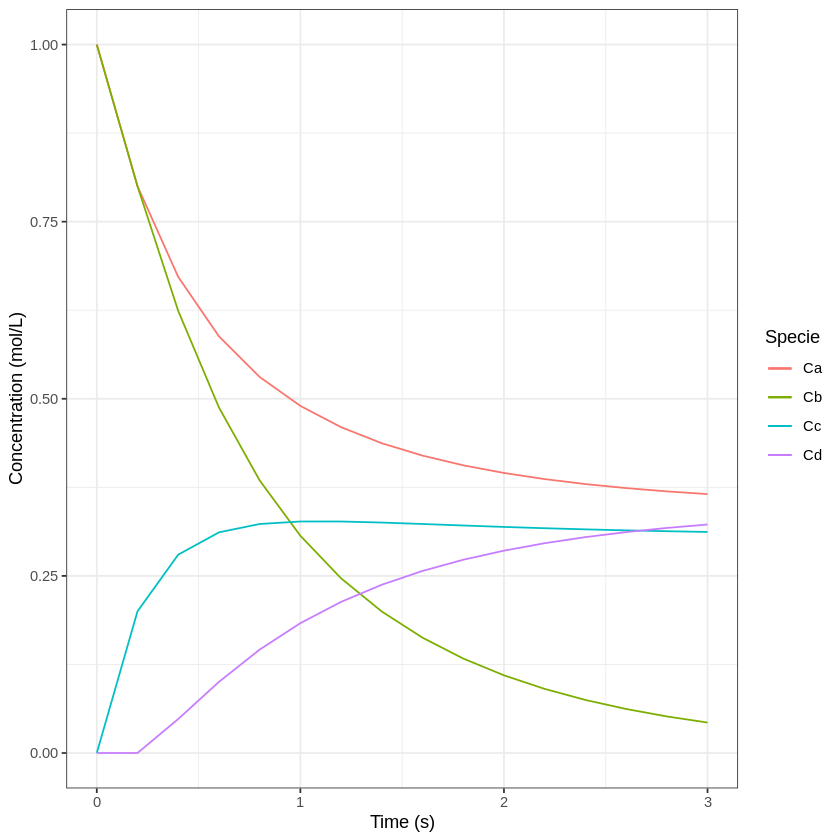

In [7]:
data <- data.frame(time = times,Ca = Ca, Cb = Cb, Cc = Cc, Cd = Cd)

ggplot(data, aes(times)) +
        geom_line(aes(y=Ca, color = "Ca")) +
        geom_line(aes(y=Cb, color = "Cb")) +
        geom_line(aes(y=Cc, color = "Cc")) +
        geom_line(aes(y=Cd, color = "Cd")) +
        xlab("Time (s)") + 
        ylab("Concentration (mol/L)") + 
        labs(color = "Specie") + 
        theme_bw()

# Integrador (Runge-Kutta)

Solo para comparar, realicemos la misma simulación empleando un integrador 

Establecer modelo 

In [13]:
model <- function(times, state, parms) {
  with(as.list(c(state,parms)),{

    # Velocidades de reacción
    r1 = k1*Ca*Cb
    r2 = k2*Cb*Cc

    # Balances de materia
    dCa = - r1
    dCb = -(r1 + r2)
    dCc = r1 - r2
    dCd = r2

    return(list(c(dCa,dCb,dCc,dCd)))
  })
}

Establecer parámetros

In [10]:
p <- c(k1 = 1, k2 = 1.5)

Establecer condiciones iniciales 

In [11]:
s <- c(Ca = 1, Cb = 1, Cc = 0, Cd = 0)

Invocar al integrador 

In [14]:
out <- ode(y = s,
          times = times,
          func = model, 
          parms = p, 
          method = "rk4")

Ca <- out[,2]
Cb <- out[,3]
Cc <- out[,4]
Cd <- out[,5]

Mostrar resultados 

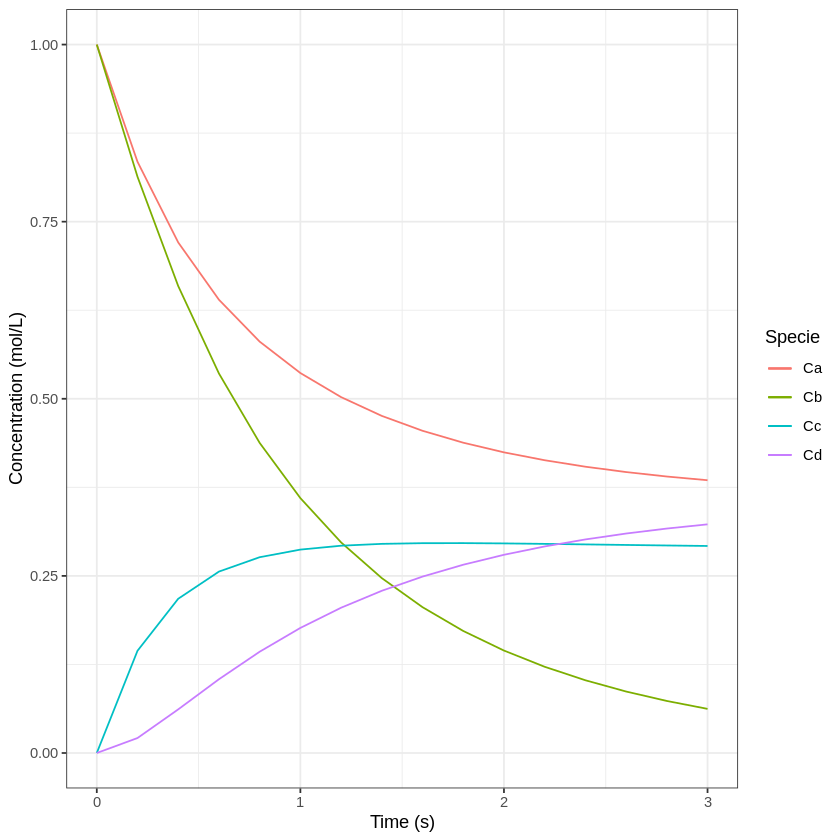

In [15]:
data <- data.frame(time = times,Ca = Ca, Cb = Cb, Cc = Cc, Cd = Cd)

ggplot(data, aes(times)) +
        geom_line(aes(y=Ca, color = "Ca")) +
        geom_line(aes(y=Cb, color = "Cb")) +
        geom_line(aes(y=Cc, color = "Cc")) +
        geom_line(aes(y=Cd, color = "Cd")) +
        xlab("Time (s)") + 
        ylab("Concentration (mol/L)") + 
        labs(color = "Specie") + 
        theme_bw()

Aun con el mismo tamaño de paso *dt*, se aprecia una mayor precisión con el integrador. 